In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

In [3]:
data = pd.read_csv('Music_Features_dataset(1).csv')

In [4]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.414594,0.128992,1728.107110,1971.853396,3682.267664,0.042981,-183.384913,184.375219,-44.855108,...,8.058545,-6.857413,5.178066,1.915593,-1.357510,4.882411,-4.552864,1.074131,0.771847,blues
1,blues.00001.wav,0.425941,0.093870,1468.274012,1970.192939,3329.752642,0.030566,-263.921970,174.199679,-13.020170,...,9.825142,-5.150926,1.277013,0.873060,-1.582037,1.928782,-6.975158,-0.088018,0.911087,blues
2,blues.00002.wav,0.417292,0.176600,1492.295620,1697.487542,2888.976467,0.039353,-172.081398,217.748701,-55.999879,...,7.721145,-10.690430,3.877006,-2.254998,-6.001119,-0.647489,-7.603417,2.648058,-3.822823,blues
3,blues.00003.wav,0.545916,0.137115,1041.880704,1576.398559,2104.308544,0.018021,-253.409788,189.660374,0.659375,...,7.629649,-3.128736,5.448136,2.906909,-2.578399,1.317633,-1.873048,2.124575,-0.957527,blues
4,blues.00004.wav,0.336454,0.086837,1705.349990,1689.171309,3322.588230,0.049459,-241.032104,198.851032,-52.522776,...,1.821858,-11.896596,-3.215003,-2.282786,-8.464440,-3.859537,-8.862044,-3.253093,-2.755675,blues


In [5]:
# music_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [21]:
data[data['label']=='jazz'][0:10]


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
500,jazz.00000.wav,0.416383,0.050466,1364.752435,1593.423698,2517.646122,0.037879,-305.683028,184.267552,-10.650563,...,-2.179836,-3.641706,0.189250,-4.988139,1.695826,-2.140926,-1.590190,-0.205382,-2.669512,jazz
501,jazz.00001.wav,0.418501,0.022560,1203.018988,1571.436492,2246.337755,0.030630,-408.682833,193.496944,-11.104417,...,-0.334237,-0.391644,4.094662,-3.149353,-0.851507,-5.885734,-3.167992,0.003304,-4.670836,jazz
502,jazz.00002.wav,0.342172,0.076772,987.653160,976.670428,1740.872041,0.028532,-318.206240,226.923992,-19.867642,...,-8.508772,-18.257951,-7.713150,-2.372416,-8.013962,-6.413640,-4.597988,-5.552296,-9.286249,jazz
503,jazz.00003.wav,0.401996,0.060162,736.243783,893.570134,1248.895805,0.022786,-357.470858,223.349798,34.027457,...,-3.971298,-8.709254,-1.199706,-2.658649,-1.068591,0.682478,-4.687032,-2.698220,-2.302433,jazz
504,jazz.00004.wav,0.241116,0.108047,940.562308,1323.464241,1579.647803,0.023310,-313.512578,184.082558,-0.637277,...,6.229237,-3.580830,-3.985066,-2.952327,-5.189140,-1.313399,-1.629281,2.985812,1.679816,jazz
505,jazz.00005.wav,0.322482,0.099853,1114.355745,1373.831870,2077.449495,0.028352,-311.698421,155.776433,-2.834126,...,2.213229,-2.960393,1.213467,1.190652,4.647427,7.917462,3.565467,7.884548,4.890804,jazz
506,jazz.00006.wav,0.370897,0.099944,1194.824333,1418.900545,2357.501042,0.025755,-287.198104,198.701397,-31.954817,...,-0.080909,-3.385082,3.906548,1.623805,-3.245606,2.804278,-7.935191,-8.363479,-2.737020,jazz
507,jazz.00007.wav,0.218350,0.094386,1097.406919,1264.065546,1748.576031,0.032582,-337.319648,178.738968,-1.147787,...,-2.637543,-0.640258,10.457119,12.772059,7.160802,4.949850,-0.227163,-0.443988,-0.868190,jazz
508,jazz.00008.wav,0.494621,0.118928,1208.323667,1565.252807,2493.135241,0.023540,-250.171737,193.814305,-34.879406,...,9.311443,-5.827084,-2.395794,-1.568653,-2.628646,3.347491,-3.408015,-0.076618,-0.287701,jazz
509,jazz.00009.wav,0.384427,0.087307,660.033451,1078.522547,970.952613,0.015156,-350.302688,207.845432,28.420291,...,5.581192,-4.194160,-0.535313,-4.067394,-8.491201,-3.567733,-8.504052,-3.105996,1.199686,jazz


In [22]:
data[data['label']=='metal'][0:10]


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
599,metal.00000.wav,0.574637,0.116337,3125.185126,2662.902769,6182.908388,0.096255,-147.386297,166.928385,-97.981717,...,-1.655723,-5.608696,16.740543,-10.185553,11.192044,-6.069320,-2.447778,3.337363,-9.216074,metal
600,metal.00001.wav,0.543198,0.092964,2859.899197,2609.535259,5987.869951,0.082390,-178.056780,174.452622,-94.664853,...,3.336159,-5.132814,15.404310,-13.619523,7.134278,-0.444139,-3.995736,5.619015,-9.594986,metal
601,metal.00002.wav,0.464289,0.132147,2132.040292,1995.415724,4377.178360,0.065529,-153.713987,211.747078,-89.337775,...,13.853516,-7.698629,6.923103,-6.448151,-5.513283,4.779626,-6.060812,3.994854,-0.771173,metal
602,metal.00003.wav,0.515795,0.150110,2679.591889,2191.236353,5134.569292,0.085804,-131.925551,179.164177,-107.232108,...,15.470666,-5.099556,13.453332,-4.883216,-1.119773,7.963497,-8.437096,4.533271,-2.570742,metal
603,metal.00004.wav,0.667648,0.063332,3339.190917,2787.368675,6783.648767,0.103558,-205.269155,159.487937,-97.690994,...,3.349616,-1.200562,17.596100,-10.633015,13.156223,-3.492802,0.060952,8.421922,-9.529708,metal
604,metal.00005.wav,0.502875,0.120155,2368.530881,2168.809962,4811.521261,0.069313,-161.607091,182.675746,-79.252507,...,11.278140,-7.386536,6.655247,-7.702683,-6.841653,1.129246,-13.131714,-0.960310,-4.599908,metal
605,metal.00006.wav,0.487549,0.050845,3215.837361,2570.983646,6226.134744,0.108868,-228.539834,164.873447,-95.062538,...,7.406855,-3.864152,13.073794,-12.287690,9.291824,-2.606207,-6.336776,5.371530,-12.134613,metal
606,metal.00007.wav,0.640268,0.068021,2941.908666,2536.886558,5824.701455,0.091589,-197.743223,168.191180,-93.716151,...,0.701958,-7.211806,15.848405,-9.921822,7.430118,-2.027263,-3.410545,6.430412,-11.550233,metal
607,metal.00008.wav,0.556072,0.057518,2796.429595,2656.271238,5877.854677,0.075076,-235.520042,162.499479,-72.304681,...,4.247568,-0.378543,13.972454,-6.567875,6.552579,-10.401841,-3.672134,2.199402,-7.618019,metal
608,metal.00009.wav,0.606609,0.320042,2175.794864,2362.375028,5028.032920,0.049782,-84.212623,201.026383,-68.880643,...,7.966016,-12.414148,13.389219,-6.376035,1.001552,10.386663,-5.230169,8.811176,-1.813392,metal


In [23]:
data[data['label']=='classical'][0:10]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
100,classical.00000.wav,0.284812,0.036666,1444.048758,1516.479409,2582.745342,0.048568,-326.039416,193.636890,-39.065936,...,4.752999,-3.969493,3.549965,4.850317,-2.500395,2.495195,0.627821,2.733024,0.901614,classical
101,classical.00001.wav,0.237181,0.031740,1325.990472,1379.376470,2221.696976,0.046069,-372.489146,185.002979,-27.780684,...,-0.834315,-7.726485,-0.811330,7.250786,1.043686,3.240969,1.560005,-4.220559,-5.837858,classical
102,classical.00002.wav,0.326428,0.040883,1443.682297,1588.628517,2698.385137,0.044789,-306.514606,206.471417,-47.774128,...,3.577954,-9.699826,3.122785,3.813208,-2.805184,5.697913,1.190554,2.897459,0.157203,classical
103,classical.00003.wav,0.278819,0.027079,1469.237466,1487.121234,2810.787458,0.054166,-369.613340,172.923604,-27.229780,...,4.093869,-1.820797,-0.568518,5.643244,5.628280,2.586746,-1.585749,1.872220,2.356077,classical
104,classical.00004.wav,0.249675,0.043222,1685.298497,1608.392345,3099.652131,0.059273,-313.904604,186.019992,-55.286255,...,5.027162,-15.116239,-3.373944,-1.759243,-5.116107,1.956714,-3.632941,3.975183,-0.216161,classical
105,classical.00005.wav,0.331313,0.040618,1390.878369,1515.692385,2745.598309,0.039282,-329.548370,190.456955,-35.553079,...,3.144207,-7.847982,0.281715,0.872372,-4.719515,0.356803,-1.691352,2.422301,3.095604,classical
106,classical.00006.wav,0.333585,0.033864,1259.328311,1502.989042,2487.010019,0.033828,-351.424807,192.527039,-29.020219,...,3.009220,-6.983450,1.797317,5.724661,-0.132669,6.112926,3.066992,1.844239,-0.636575,classical
107,classical.00007.wav,0.347634,0.040364,1339.884678,1501.189393,2604.138654,0.038872,-340.819956,181.743185,-29.057245,...,6.274882,-3.027529,0.587256,-0.486647,-5.959679,-1.337295,-0.075699,5.651548,4.729890,classical
108,classical.00008.wav,0.299588,0.038364,1497.604251,1618.889593,2935.610091,0.041877,-331.185785,192.730577,-46.243467,...,6.209949,-8.293073,2.689671,4.926226,-2.923563,2.775908,0.224524,3.566269,0.338250,classical
109,classical.00009.wav,0.366550,0.025567,1131.860961,1505.094267,2326.804987,0.027474,-402.803544,191.437813,-15.435287,...,6.471863,-7.175300,-0.132859,2.935842,-3.891930,0.520432,-1.578911,0.590453,1.648280,classical


In [24]:
data[data['label']=='pop'][0:10]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
699,pop.00000.wav,0.486013,0.190226,2957.488230,3102.179498,6960.372984,0.067456,-160.689515,139.894998,-41.764289,...,-8.779779,-7.698869,12.047264,-13.036973,7.685816,-7.219338,0.986416,4.726081,-3.678959,pop
700,pop.00001.wav,0.466590,0.257704,3299.224490,3178.293979,7308.882978,0.082721,-130.384376,129.619936,-41.833037,...,0.233388,-4.630467,8.940767,-11.319594,8.957973,-6.265081,1.741192,2.050866,-1.859452,pop
701,pop.00002.wav,0.480972,0.211909,2920.322363,3067.838817,6840.070957,0.066293,-137.331660,150.828913,-44.093925,...,-0.931111,-1.377542,12.166417,-7.776532,15.799072,-1.497624,8.159616,9.318964,-3.245052,pop
702,pop.00003.wav,0.499967,0.132428,1633.027814,1884.798729,3304.436967,0.043133,-191.639697,191.816544,-39.504482,...,4.484151,-6.882505,8.177361,-7.680031,0.237053,1.848919,-2.603037,0.519823,2.528067,pop
703,pop.00004.wav,0.430919,0.216987,2541.558084,2668.022414,5524.306273,0.066886,-100.103097,181.119272,-64.381985,...,-0.820851,-5.111767,8.995379,-13.011774,9.428988,-4.637299,1.410512,0.227287,-6.992453,pop
704,pop.00005.wav,0.376939,0.159192,2169.648737,2246.064092,4455.263713,0.059863,-153.989782,184.376617,-68.578556,...,-3.618944,-7.008563,5.564261,-10.670153,3.559954,-6.090011,-1.563370,-0.348841,-5.945417,pop
705,pop.00006.wav,0.512631,0.097541,1920.785507,2493.755807,4498.809967,0.036253,-227.124511,157.069748,-18.924158,...,1.191339,-2.712439,7.493731,-7.933866,1.423016,-3.788637,0.986691,0.366378,-6.066509,pop
706,pop.00007.wav,0.294755,0.081174,1730.781400,2091.605865,3545.290942,0.040289,-281.797937,163.344017,-16.468115,...,0.843811,-9.320480,3.293627,0.962788,10.589563,4.953690,6.547401,2.612545,-2.090303,pop
707,pop.00008.wav,0.466833,0.196511,2655.695873,2740.524528,5716.545594,0.069894,-123.501333,170.500769,-63.314123,...,0.769065,-4.295179,8.869693,-13.228845,9.436302,-6.156802,1.829746,2.195392,-6.775607,pop
708,pop.00009.wav,0.506060,0.167487,2968.994149,2794.460591,6310.488118,0.089039,-110.381478,161.899175,-67.048150,...,-6.067325,-10.505062,6.246170,-9.539404,9.739496,-7.393180,2.737647,2.397276,-8.745884,pop


In [25]:
data[data['label']=='blues'][0:10]


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.414594,0.128992,1728.107110,1971.853396,3682.267664,0.042981,-183.384913,184.375219,-44.855108,...,8.058545,-6.857413,5.178066,1.915593,-1.357510,4.882411,-4.552864,1.074131,0.771847,blues
1,blues.00001.wav,0.425941,0.093870,1468.274012,1970.192939,3329.752642,0.030566,-263.921970,174.199679,-13.020170,...,9.825142,-5.150926,1.277013,0.873060,-1.582037,1.928782,-6.975158,-0.088018,0.911087,blues
2,blues.00002.wav,0.417292,0.176600,1492.295620,1697.487542,2888.976467,0.039353,-172.081398,217.748701,-55.999879,...,7.721145,-10.690430,3.877006,-2.254998,-6.001119,-0.647489,-7.603417,2.648058,-3.822823,blues
3,blues.00003.wav,0.545916,0.137115,1041.880704,1576.398559,2104.308544,0.018021,-253.409788,189.660374,0.659375,...,7.629649,-3.128736,5.448136,2.906909,-2.578399,1.317633,-1.873048,2.124575,-0.957527,blues
4,blues.00004.wav,0.336454,0.086837,1705.349990,1689.171309,3322.588230,0.049459,-241.032104,198.851032,-52.522776,...,1.821858,-11.896596,-3.215003,-2.282786,-8.464440,-3.859537,-8.862044,-3.253093,-2.755675,blues
5,blues.00005.wav,0.373034,0.107084,1869.429103,1738.723628,3556.265951,0.053027,-228.405419,166.384203,-35.528888,...,-0.447557,-10.753520,-4.392695,-2.482538,-12.999632,-4.789949,-3.860854,-4.933323,-2.728052,blues
6,blues.00006.wav,0.367912,0.139512,1354.351202,1321.693129,2582.755334,0.037515,-240.879119,173.640869,-21.053427,...,-3.579669,-5.982988,-4.653972,-3.301783,-8.470300,-6.570950,-5.889385,-8.512289,-9.321085,blues
7,blues.00007.wav,0.386639,0.138760,1378.166623,1499.301240,2793.211169,0.032048,-234.994640,183.820405,-25.942547,...,-2.262826,-7.204759,-7.472506,-1.859722,-5.454436,-5.922247,-7.282810,-6.817285,-8.314255,blues
8,blues.00008.wav,0.506521,0.139084,1639.132111,2002.528393,3649.053573,0.032732,-197.187943,190.586512,-46.383568,...,17.220253,-4.194253,4.628593,-2.478960,-6.205304,6.840506,-4.772861,-1.218878,-2.761217,blues
9,blues.00009.wav,0.328638,0.080272,1715.253092,1918.858148,3720.148116,0.040565,-269.910510,168.728172,-29.038917,...,5.130688,-5.064693,0.128761,5.272573,-5.865427,-1.770785,-1.807287,-0.628877,-0.360864,blues


In [26]:
dataset = data[data['label'].isin(['jazz', 'metal','classical','blues','pop'])].drop(['filename'],axis=1)
dataset.shape

(499, 27)

In [27]:
# K Neighbors Classification

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [29]:
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
print(y)
y.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

(499,)

In [30]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
print(X)
X.shape

[[-1.15742707e-01  8.29361219e-02 -3.37481738e-01 ... -4.24153070e-01
  -2.73530006e-01  9.43042281e-01]
 [-1.26753378e-03 -3.86902603e-01 -6.85020549e-01 ... -9.42887313e-01
  -5.61289816e-01  9.77763996e-01]
 [-8.85219163e-02  7.19803187e-01 -6.52890534e-01 ... -1.07742894e+00
   1.16190370e-01 -2.02710189e-01]
 ...
 [ 1.23680703e+00  1.02678513e+00  1.43113108e+00 ...  1.06126986e+00
  -2.37846584e-02 -8.13081665e-01]
 [ 2.75358482e-01  1.09749524e+00  1.90398983e+00 ...  1.19583608e+00
   7.47350909e-02 -9.52909657e-01]
 [ 6.98454478e-02  2.02460027e-01  6.13186344e-01 ...  9.11790868e-01
  -3.04730013e-01 -8.72123194e-01]]


(499, 26)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (399, 26) (399,)
Test set: (100, 26) (100,)


In [50]:
knn = KNeighborsClassifier(n_neighbors=5)

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
pred = knn.predict(X_test)
print(pred)

[4 0 2 1 2 4 1 0 3 1 1 4 3 1 1 4 4 0 1 4 2 1 4 0 0 0 3 4 3 0 4 3 1 0 3 3 0
 1 4 2 1 4 0 3 2 0 3 1 3 3 1 4 0 1 0 3 4 4 4 2 4 0 4 1 2 1 3 0 4 2 4 1 0 0
 4 1 2 3 0 4 3 4 1 4 3 1 3 4 1 4 3 0 3 4 0 2 3 0 3 3]


In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.76      1.00      0.86        16
           2       0.90      0.56      0.69        16
           3       0.73      0.94      0.82        17
           4       0.92      1.00      0.96        24

   micro avg       0.84      0.84      0.84       100
   macro avg       0.84      0.84      0.83       100
weighted avg       0.86      0.84      0.83       100



In [20]:
# KMeans Clustering

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

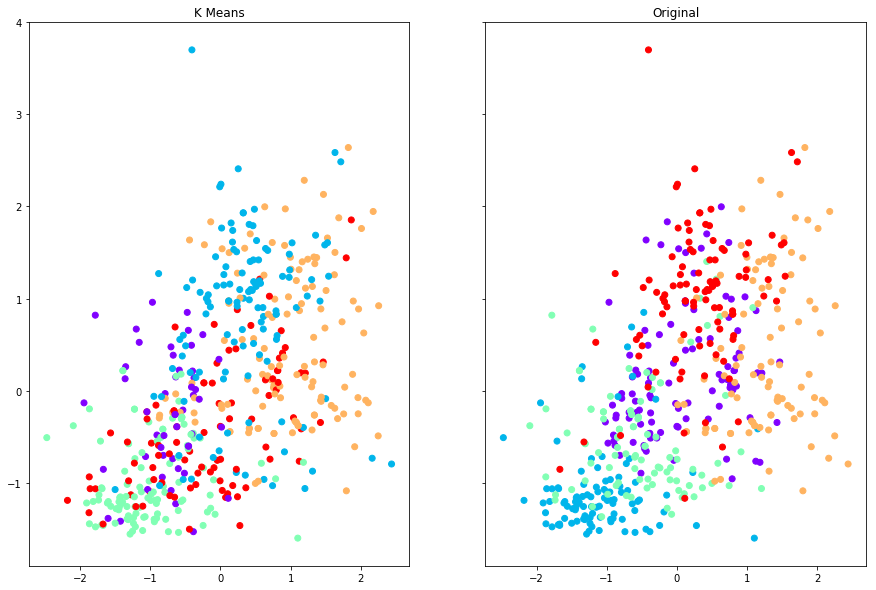

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))
ax1.set_title('K Means')
ax1.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

In [23]:
#Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='lbfgs', verbose=0 ,multi_class='auto').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = LR.predict(X_test)
y_pred

array([4, 3, 2, 1, 2, 4, 1, 3, 3, 2, 1, 2, 3, 1, 1, 4, 4, 0, 1, 4, 2, 2,
       4, 3, 3, 0, 3, 4, 3, 3, 4, 3, 1, 0, 3, 3, 0, 1, 4, 4, 1, 4, 0, 3,
       0, 0, 3, 1, 3, 3, 2, 4, 3, 1, 2, 3, 4, 4, 4, 2, 4, 0, 4, 1, 2, 1,
       3, 0, 4, 2, 4, 1, 0, 0, 4, 1, 1, 3, 3, 4, 3, 4, 1, 4, 3, 1, 3, 4,
       1, 2, 3, 0, 3, 4, 0, 2, 3, 2, 3, 3])

In [26]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.44      0.60        27
           1       0.84      1.00      0.91        16
           2       0.79      0.69      0.73        16
           3       0.59      1.00      0.74        17
           4       0.96      1.00      0.98        24

   micro avg       0.80      0.80      0.80       100
   macro avg       0.82      0.83      0.79       100
weighted avg       0.84      0.80      0.79       100



In [27]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

0.8

In [28]:
#Support Vector Machines

In [30]:
from sklearn import svm

In [59]:
rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=1).fit(X_train, y_train)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [61]:
print("Poly_pred:")
print (classification_report(y_test, poly_pred))

Poly_pred:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.94      0.94      0.94        16
           2       0.75      0.94      0.83        16
           3       0.75      0.88      0.81        17
           4       1.00      1.00      1.00        24

   micro avg       0.87      0.87      0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



In [62]:
print("Rbf_pred:")
print (classification_report(y_test, rbf_pred))

Rbf_pred:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.94      0.94      0.94        16
           2       0.78      0.88      0.82        16
           3       0.75      0.88      0.81        17
           4       0.96      1.00      0.98        24

   micro avg       0.87      0.87      0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



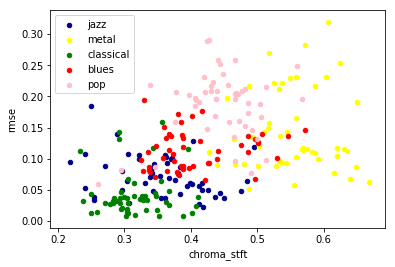

In [63]:
ax = dataset[dataset['label'] == 'jazz'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='DarkBlue', label='jazz');
dataset[dataset['label'] == 'metal'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Yellow', label='metal', ax=ax);
dataset[dataset['label'] == 'classical'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Green', label='classical', ax=ax);
dataset[dataset['label'] == 'blues'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Red', label='blues', ax=ax);
dataset[dataset['label'] == 'pop'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Pink', label='pop', ax=ax);
plt.show()

In [104]:
#Decsission Trees

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [122]:
musicTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
musicTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
musicTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [124]:
predTree = musicTree.predict(X_test)

In [125]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.79


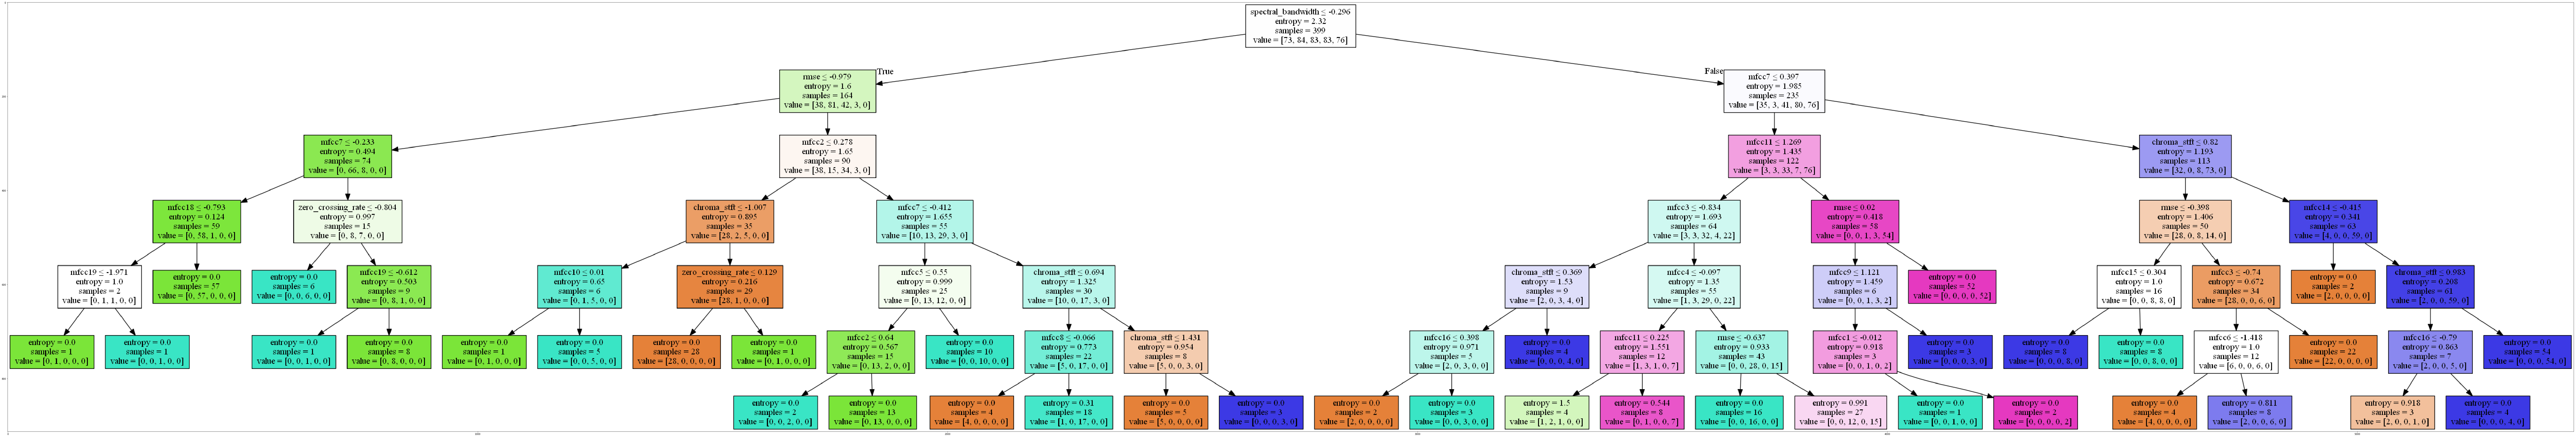

In [132]:
dot_data = StringIO()
filename = "musictree.png"
featureNames = dataset.columns[0:26]
targetNames = dataset["label"].unique().tolist()
out=tree.export_graphviz(musicTree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 400))
plt.imshow(img,interpolation='nearest')